# Airline Delay Prediction

In this Notebook we will predict Delays caused by airlines for the year 2018.





First we are importing necessary libraries to read CSV file.

In [181]:
import pandas as pd;
import re;
import glob;
import os;
import datetime, warnings, scipy 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from matplotlib.pyplot import figure
from sklearn.ensemble import AdaBoostRegressor


We are reading the data file from local directory

In [182]:
Data_2018 = pd.read_csv("2018.csv")

Checking how the data looks.

In [183]:
Data_2018.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
Data_2018.shape

(7213446, 28)

Checking the proportion of null data of each column in our dataset.  

In [185]:
print("Null value percentage of each column")
print("\n")

print(Data_2018.isnull().sum()*100/Data_2018.shape[0])

Null value percentage of each column


FL_DATE                  0.000000
OP_CARRIER               0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN                   0.000000
DEST                     0.000000
CRS_DEP_TIME             0.000000
DEP_TIME                 1.557051
DEP_DELAY                1.625215
TAXI_OUT                 1.605751
WHEELS_OFF               1.605737
WHEELS_ON                1.653107
TAXI_IN                  1.653107
CRS_ARR_TIME             0.000000
ARR_TIME                 1.653093
ARR_DELAY                1.899785
CANCELLED                0.000000
CANCELLATION_CODE       98.383796
DIVERTED                 0.000000
CRS_ELAPSED_TIME         0.000139
ACTUAL_ELAPSED_TIME      1.863769
AIR_TIME                 1.863769
DISTANCE                 0.000000
CARRIER_DELAY           81.247382
WEATHER_DELAY           81.247382
NAS_DELAY               81.247382
SECURITY_DELAY          81.247382
LATE_AIRCRAFT_DELAY     81.247382
Unnamed: 27            100.000000
dtype: fl

We are Removing the Column "Unnamed : 27" as it is totally empty.




"Unnamed : 27" is not useful for our prediction.

In [186]:
Data_2018 = Data_2018.drop(["Unnamed: 27"], axis=1)

We are removing null values from the columns :


DEP_TIME

DEP_DELAY

TAXI_OUT

WHEELS_OFF

WHEELS_ON

TAXI_IN

ARR_TIME

ARR_DELAY

CRS_ELAPSED_TIME

ACTUAL_ELAPSED_TIME

AIR_TIME

All these columns have very less null value comparing to values which are not null.

Removing these rows won't affect our result.


In [187]:
Data_2018_updated=Data_2018.dropna(subset = ['DEP_TIME','DEP_DELAY','TAXI_OUT','WHEELS_OFF','WHEELS_ON',
                                                           'TAXI_IN','ARR_TIME','ARR_DELAY','CRS_ELAPSED_TIME',
                                                           'ACTUAL_ELAPSED_TIME','AIR_TIME'])

In [188]:
Data_2018_updated.shape

(7071817, 27)

In [189]:
Data_2018_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [190]:
Data_2018_updated.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                    0
TAXI_OUT                     0
WHEELS_OFF                   0
WHEELS_ON                    0
TAXI_IN                      0
CRS_ARR_TIME                 0
ARR_TIME                     0
ARR_DELAY                    0
CANCELLED                    0
CANCELLATION_CODE      7071817
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME          0
AIR_TIME                     0
DISTANCE                     0
CARRIER_DELAY          5719442
WEATHER_DELAY          5719442
NAS_DELAY              5719442
SECURITY_DELAY         5719442
LATE_AIRCRAFT_DELAY    5719442
dtype: int64

This is a code which converts the departure and arrival time in a proper format.

In [191]:
def ConvertTimeFormat(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            hour_min = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return hour_min

We are calling the above code on the following attributes:
    
*Scheduled_Departure*

*Actual_Departure*

*Scheduled_Arrival*

*Actual_Arrival*

Now they have been converted into proper format.

In [192]:
Data_2018_updated['Scheduled_Departure'] =Data_2018_updated['CRS_DEP_TIME'].apply(ConvertTimeFormat)
Data_2018_updated['Actual_Departure'] =Data_2018_updated['DEP_TIME'].apply(ConvertTimeFormat)
Data_2018_updated['Scheduled_Arrival'] =Data_2018_updated['CRS_ARR_TIME'].apply(ConvertTimeFormat)
Data_2018_updated['Actual_Arrival'] =Data_2018_updated['ARR_TIME'].apply(ConvertTimeFormat)

<ipython-input-192-8024b9f05234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2018_updated['Scheduled_Departure'] =Data_2018_updated['CRS_DEP_TIME'].apply(ConvertTimeFormat)
<ipython-input-192-8024b9f05234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2018_updated['Actual_Departure'] =Data_2018_updated['DEP_TIME'].apply(ConvertTimeFormat)
<ipython-input-192-8024b9f05234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [193]:
Data_2018_updated.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival',
       'Actual_Arrival'],
      dtype='object')

Changing the Name of OP_CARRIER to Real Flight Names:

In [194]:
Data_2018_updated['OP_CARRIER'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [195]:
airline_names=pd.read_csv("AirlineNames.csv")

In [196]:
Data_2018_updated = Data_2018_updated.merge(airline_names, left_on='OP_CARRIER', right_on='IATA code', how='inner')

In [197]:
Data_2018_updated.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival',
       'Actual_Arrival', 'IATA code', 'Airline'],
      dtype='object')

We are removing the column IATA code because it has the same data as OP_CARRIER

In [198]:
Data_2018_updated = Data_2018_updated.drop(['IATA code'], axis=1)

In [199]:
Data_2018_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 0 to 7071816
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

FL_DATE is of the Format Object(String) so we are converting it into Proper Data format

In [200]:
Data_2018_updated['FL_DATE']=pd.to_datetime(Data_2018_updated['FL_DATE'])

The FL_DATE's Dtype is converted from Object to datetime64[ns]

In [201]:
Data_2018_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7071817 entries, 0 to 7071816
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [202]:
Data_2018_updated.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY                    0
TAXI_OUT                     0
WHEELS_OFF                   0
WHEELS_ON                    0
TAXI_IN                      0
CRS_ARR_TIME                 0
ARR_TIME                     0
ARR_DELAY                    0
CANCELLED                    0
CANCELLATION_CODE      7071817
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME          0
AIR_TIME                     0
DISTANCE                     0
CARRIER_DELAY          5719442
WEATHER_DELAY          5719442
NAS_DELAY              5719442
SECURITY_DELAY         5719442
LATE_AIRCRAFT_DELAY    5719442
Scheduled_Departure          0
Actual_Departure           628
Scheduled_Arrival           89
Actual_Arrival            3441
Airline                      0
dtype: i

Removing The NAN values from the column:
    
*Actual_Departure*

*Scheduled_Arrival*  

*Actual_Arrival*

Since they are very few, removing them won't affect our prediction in any way.

In [203]:
Data_2018_updated=Data_2018_updated.dropna(subset = ['Actual_Departure','Scheduled_Arrival','Actual_Arrival'])

Changing the Airline code to Name

Renaming the name of all columns in an understable way

In [204]:
Data_2018_updated

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Scheduled_Departure,Actual_Departure,Scheduled_Arrival,Actual_Arrival,Airline
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,NaN,NaN,NaN,NaN,NaN,15:17:00,15:12:00,17:45:00,17:22:00,United Air Lines Inc.
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,NaN,NaN,NaN,NaN,NaN,11:15:00,11:07:00,12:54:00,12:30:00,United Air Lines Inc.
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,NaN,NaN,NaN,NaN,NaN,13:35:00,13:30:00,16:49:00,16:36:00,United Air Lines Inc.
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,NaN,NaN,NaN,NaN,NaN,15:46:00,15:52:00,17:56:00,17:54:00,United Air Lines Inc.
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,NaN,NaN,NaN,NaN,NaN,06:30:00,06:50:00,09:22:00,09:36:00,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071812,2018-12-31,DL,1725,ATL,SRQ,1025,1030.0,5.0,25.0,1055.0,...,NaN,NaN,NaN,NaN,NaN,10:25:00,10:30:00,11:56:00,12:04:00,Delta Air Lines Inc.
7071813,2018-12-31,DL,1725,SRQ,ATL,1240,1243.0,3.0,11.0,1254.0,...,NaN,NaN,NaN,NaN,NaN,12:40:00,12:43:00,14:20:00,14:14:00,Delta Air Lines Inc.
7071814,2018-12-31,DL,1726,ATL,FLL,1405,1427.0,22.0,13.0,1440.0,...,NaN,NaN,NaN,NaN,NaN,14:05:00,14:27:00,15:55:00,16:07:00,Delta Air Lines Inc.
7071815,2018-12-31,DL,1726,FLL,ATL,1655,1655.0,0.0,17.0,1712.0,...,NaN,NaN,NaN,NaN,NaN,16:55:00,16:55:00,18:51:00,18:34:00,Delta Air Lines Inc.


In [205]:
Data_2018_updated.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival',
       'Actual_Arrival', 'Airline'],
      dtype='object')

In [206]:
final_data = pd.DataFrame(Data_2018_updated[['Airline','ORIGIN','DEST','DISTANCE','Actual_Departure','FL_DATE',
                               'Scheduled_Departure','DEP_DELAY','Actual_Arrival','Scheduled_Arrival','ARR_DELAY',
                              'CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED','CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']])

In [207]:
final_data = final_data.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [208]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7067661 entries, 0 to 7071816
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Airline              object        
 1   ORIGIN               object        
 2   DEST                 object        
 3   DISTANCE             float64       
 4   Actual_Departure     object        
 5   FL_DATE              datetime64[ns]
 6   Scheduled_Departure  object        
 7   DEP_DELAY            float64       
 8   Actual_Arrival       object        
 9   Scheduled_Arrival    object        
 10  ARR_DELAY            float64       
 11  CRS_ELAPSED_TIME     float64       
 12  ACTUAL_ELAPSED_TIME  float64       
 13  AIR_TIME             float64       
 14  TAXI_IN              float64       
 15  TAXI_OUT             float64       
 16  DIVERTED             float64       
 17  CARRIER_DELAY        float64       
 18  WEATHER_DELAY        float64       
 19  NAS_DELAY            

We have created an intermediate Dataframe which now we will turn into Feature Vector

In [209]:
final_flights = final_data
final_flights

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,United Air Lines Inc.,EWR,DEN,1605.0,15:12:00,2018-01-01,15:17:00,-5.0,17:22:00,17:45:00,...,250.0,225.0,10.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,LAS,SFO,414.0,11:07:00,2018-01-01,11:15:00,-8.0,12:30:00,12:54:00,...,83.0,65.0,7.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
2,United Air Lines Inc.,SNA,DEN,846.0,13:30:00,2018-01-01,13:35:00,-5.0,16:36:00,16:49:00,...,126.0,106.0,5.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,RSW,ORD,1120.0,15:52:00,2018-01-01,15:46:00,6.0,17:54:00,17:56:00,...,182.0,157.0,6.0,19.0,0.0,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,ORD,ALB,723.0,06:50:00,2018-01-01,06:30:00,20.0,09:36:00,09:22:00,...,106.0,83.0,10.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071812,Delta Air Lines Inc.,ATL,SRQ,444.0,10:30:00,2018-12-31,10:25:00,5.0,12:04:00,11:56:00,...,94.0,66.0,3.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN
7071813,Delta Air Lines Inc.,SRQ,ATL,444.0,12:43:00,2018-12-31,12:40:00,3.0,14:14:00,14:20:00,...,91.0,74.0,6.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
7071814,Delta Air Lines Inc.,ATL,FLL,581.0,14:27:00,2018-12-31,14:05:00,22.0,16:07:00,15:55:00,...,100.0,84.0,3.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN
7071815,Delta Air Lines Inc.,FLL,ATL,581.0,16:55:00,2018-12-31,16:55:00,0.0,18:34:00,18:51:00,...,99.0,77.0,5.0,17.0,0.0,NaN,NaN,NaN,NaN,NaN


We are Looking at a corelation matrix graph. This helps us understand which attribure is most and least co-related with which attribute. 

From the graph we can see that **AIR_TIME** is closely corelated with **CRS_ELAPSED_TIME** and **ACTUAL_ELAPSED_TIME**

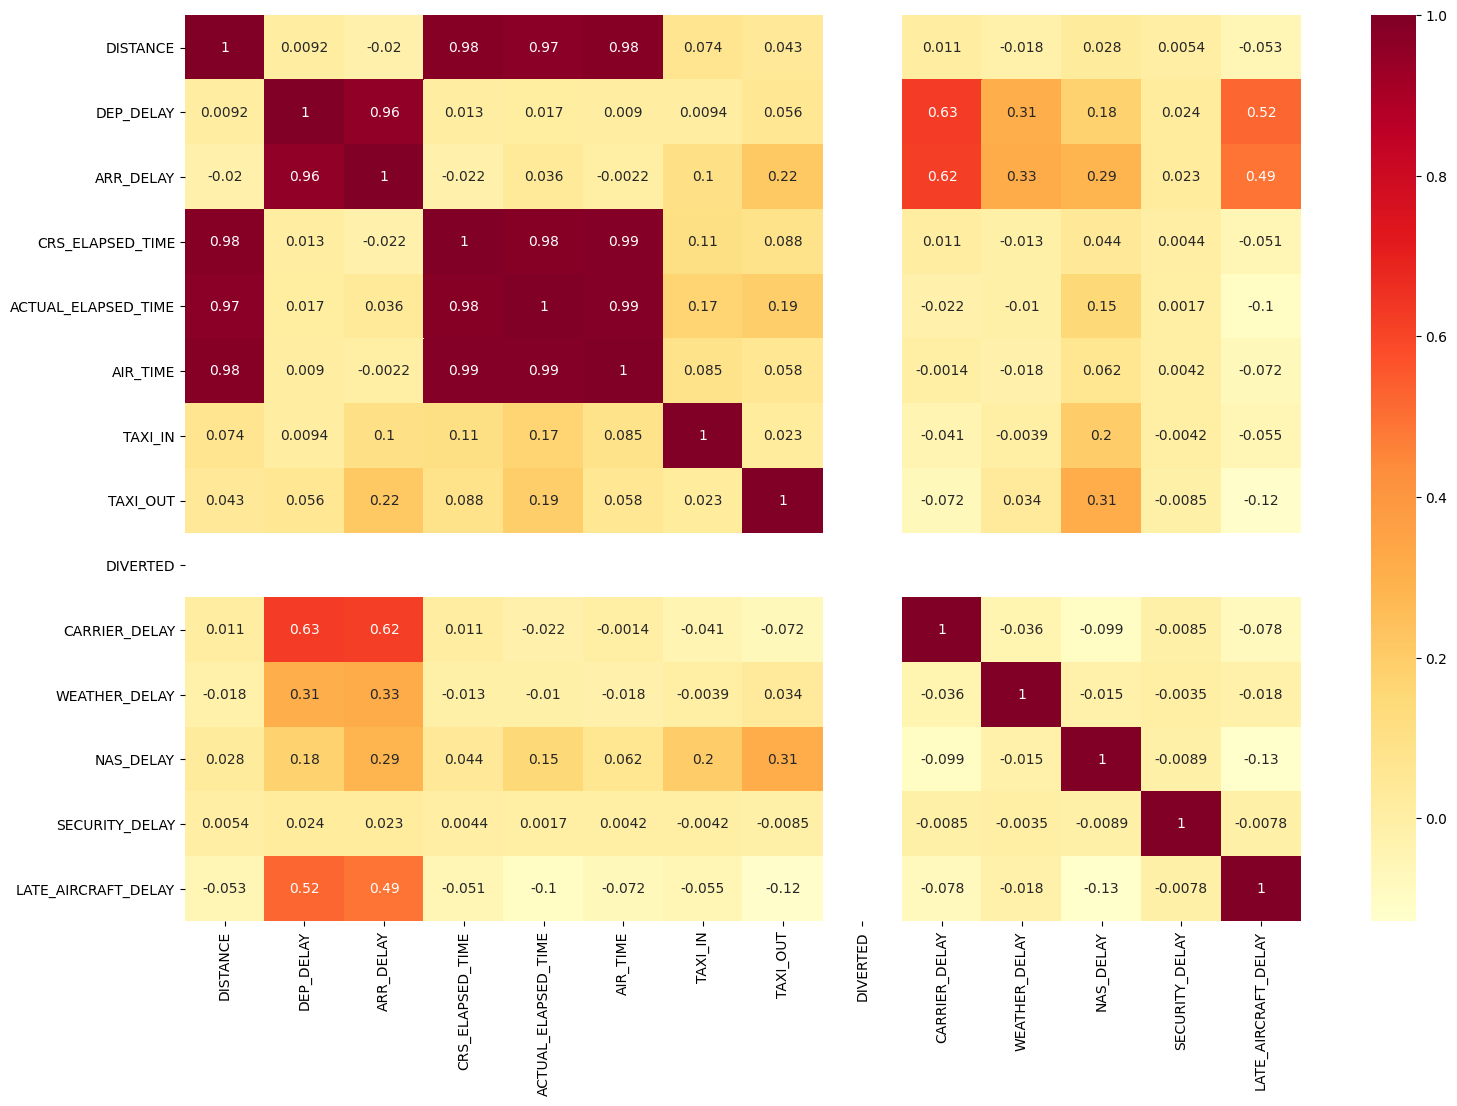

In [210]:

plt.subplots(figsize=(18,12))
corrMatrix = final_flights.corr()
sns.heatmap(corrMatrix,cmap="YlOrRd", annot=True)
plt.show()

Here we are converting **FL_DATE** into a new attribute since the date fromat cannot be given as an input to our machine learning algorithm we are converting it into a Feature, **DAY**.

In [211]:
final_flights['Date'] = pd.DatetimeIndex(final_flights['FL_DATE']).day

In [212]:

def Calculate_week(Date):
    Week1=[1,2,3,4,5,6,7];
    Week2=[8,9,10,11,12,13,14];
    Week3=[15,16,17,18,19,20,21]
    Week4=[22,23,24,25,26,27,28]
    
    if(Date in Week1):
        return "1stWeek"

    elif(Date in Week2):
        return "2ndWeek"

    elif(Date in Week3):
        return "3rdWeek"

    elif(Date in Week4):
        return "4thWeek"

    else:
        return "5thWeek"
    
final_flights['Calculated_Week'] = final_flights["Date"].apply(Calculate_week)

In [213]:
week_monthSum = final_flights.groupby('Calculated_Week')["ARR_DELAY"].sum()
print("This is the week month sum:",week_monthSum);
week_monthCount = final_flights.groupby('Calculated_Week')["ARR_DELAY"].count()
print("This is the week month count:",week_monthCount);
Graph = pd.concat([week_monthSum, week_monthCount],axis=1, keys=["week_monthSum", "week_monthCount"])

Graph["Mean Delay"] = Graph["week_monthSum"]/Graph["week_monthCount"]

This is the week month sum: Calculated_Week
1stWeek     7696784.0
2ndWeek     8321501.0
3rdWeek    11002800.0
4thWeek     7071082.0
5thWeek     1528633.0
Name: ARR_DELAY, dtype: float64
This is the week month count: Calculated_Week
1stWeek    1595795
2ndWeek    1633295
3rdWeek    1636704
4thWeek    1633152
5thWeek     568715
Name: ARR_DELAY, dtype: int64


In [214]:
final_flights.tail()

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,TAXI_IN,TAXI_OUT,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,Calculated_Week
7071812,Delta Air Lines Inc.,ATL,SRQ,444.0,10:30:00,2018-12-31,10:25:00,5.0,12:04:00,11:56:00,...,3.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek
7071813,Delta Air Lines Inc.,SRQ,ATL,444.0,12:43:00,2018-12-31,12:40:00,3.0,14:14:00,14:20:00,...,6.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek
7071814,Delta Air Lines Inc.,ATL,FLL,581.0,14:27:00,2018-12-31,14:05:00,22.0,16:07:00,15:55:00,...,3.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek
7071815,Delta Air Lines Inc.,FLL,ATL,581.0,16:55:00,2018-12-31,16:55:00,0.0,18:34:00,18:51:00,...,5.0,17.0,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek
7071816,Delta Air Lines Inc.,BZN,MSP,874.0,05:44:00,2018-12-31,05:45:00,-1.0,09:00:00,09:22:00,...,4.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek


We are Creating a new dataframe which will hold Airline name and its Code. This will be useful for our research question.
For predicting the Airline with most delay we would need the name of the Airline.

In [215]:
final_flights['Airline_copy']=final_flights['Airline']
final_flights.head()

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,TAXI_OUT,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,Calculated_Week,Airline_copy
0,United Air Lines Inc.,EWR,DEN,1605.0,15:12:00,2018-01-01,15:17:00,-5.0,17:22:00,17:45:00,...,15.0,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.
1,United Air Lines Inc.,LAS,SFO,414.0,11:07:00,2018-01-01,11:15:00,-8.0,12:30:00,12:54:00,...,11.0,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.
2,United Air Lines Inc.,SNA,DEN,846.0,13:30:00,2018-01-01,13:35:00,-5.0,16:36:00,16:49:00,...,15.0,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.
3,United Air Lines Inc.,RSW,ORD,1120.0,15:52:00,2018-01-01,15:46:00,6.0,17:54:00,17:56:00,...,19.0,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.
4,United Air Lines Inc.,ORD,ALB,723.0,06:50:00,2018-01-01,06:30:00,20.0,09:36:00,09:22:00,...,13.0,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.


In [216]:
final_flights['Status'] = np.where(final_flights['ARR_DELAY']<=0, 0,1)
final_flights

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,Calculated_Week,Airline_copy,Status
0,United Air Lines Inc.,EWR,DEN,1605.0,15:12:00,2018-01-01,15:17:00,-5.0,17:22:00,17:45:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.,0
1,United Air Lines Inc.,LAS,SFO,414.0,11:07:00,2018-01-01,11:15:00,-8.0,12:30:00,12:54:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.,0
2,United Air Lines Inc.,SNA,DEN,846.0,13:30:00,2018-01-01,13:35:00,-5.0,16:36:00,16:49:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.,0
3,United Air Lines Inc.,RSW,ORD,1120.0,15:52:00,2018-01-01,15:46:00,6.0,17:54:00,17:56:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.,0
4,United Air Lines Inc.,ORD,ALB,723.0,06:50:00,2018-01-01,06:30:00,20.0,09:36:00,09:22:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,United Air Lines Inc.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071812,Delta Air Lines Inc.,ATL,SRQ,444.0,10:30:00,2018-12-31,10:25:00,5.0,12:04:00,11:56:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,Delta Air Lines Inc.,1
7071813,Delta Air Lines Inc.,SRQ,ATL,444.0,12:43:00,2018-12-31,12:40:00,3.0,14:14:00,14:20:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,Delta Air Lines Inc.,0
7071814,Delta Air Lines Inc.,ATL,FLL,581.0,14:27:00,2018-12-31,14:05:00,22.0,16:07:00,15:55:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,Delta Air Lines Inc.,1
7071815,Delta Air Lines Inc.,FLL,ATL,581.0,16:55:00,2018-12-31,16:55:00,0.0,18:34:00,18:51:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,Delta Air Lines Inc.,0


## Exploratory Analysis:

We have performed analysis on Flight delays Based on Days, Weeks and Months.

1. In our First graph we have shown Number of flight that is delayed for each day.
    It can be seen that there is an increased number of delays in flights in the mid month (around 15-16 of each month) and it decreases towards the end of the month. Delays on 30th and 31st are the lowest. 
    

2. In our Second graph we have shown Number of flight that is delayed on Weekly basis.
    It can be seen that there is an increased average number of delays in flights in the **3rd week** and it decreases towards the end of the month. The delay average is very less  in the **last week**.
    

3. In our Third graph we have shown Number of flight that is delayed on a monthly basis.
    It can be seen that **July** and **August** has highest number of delayed flights where **February** and **January** has the least delays
    
    

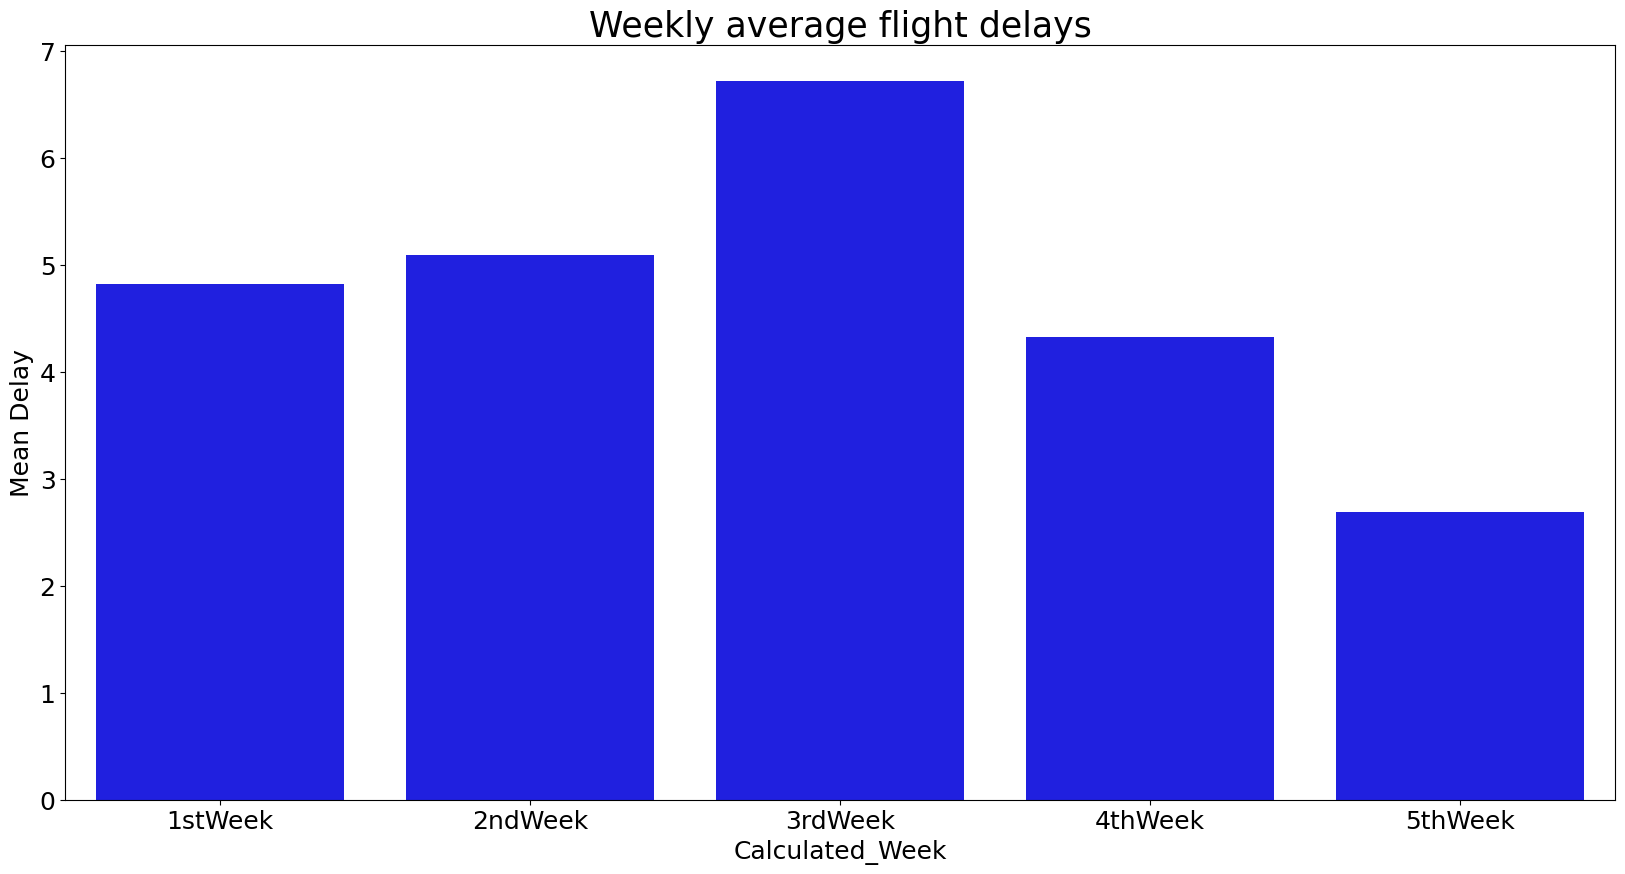

In [217]:
#This labels X-axis
plt.figure(figsize=(20, 10))
plt.xlabel("Weeks",fontsize=18)
#This labels Y-axis
plt.ylabel("Mean Delay",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#Graph code
sns.barplot(x=Graph.index, y ='Mean Delay', data=Graph, color ='blue')
fig = plt.title("Weekly average flight delays",fontsize=25)





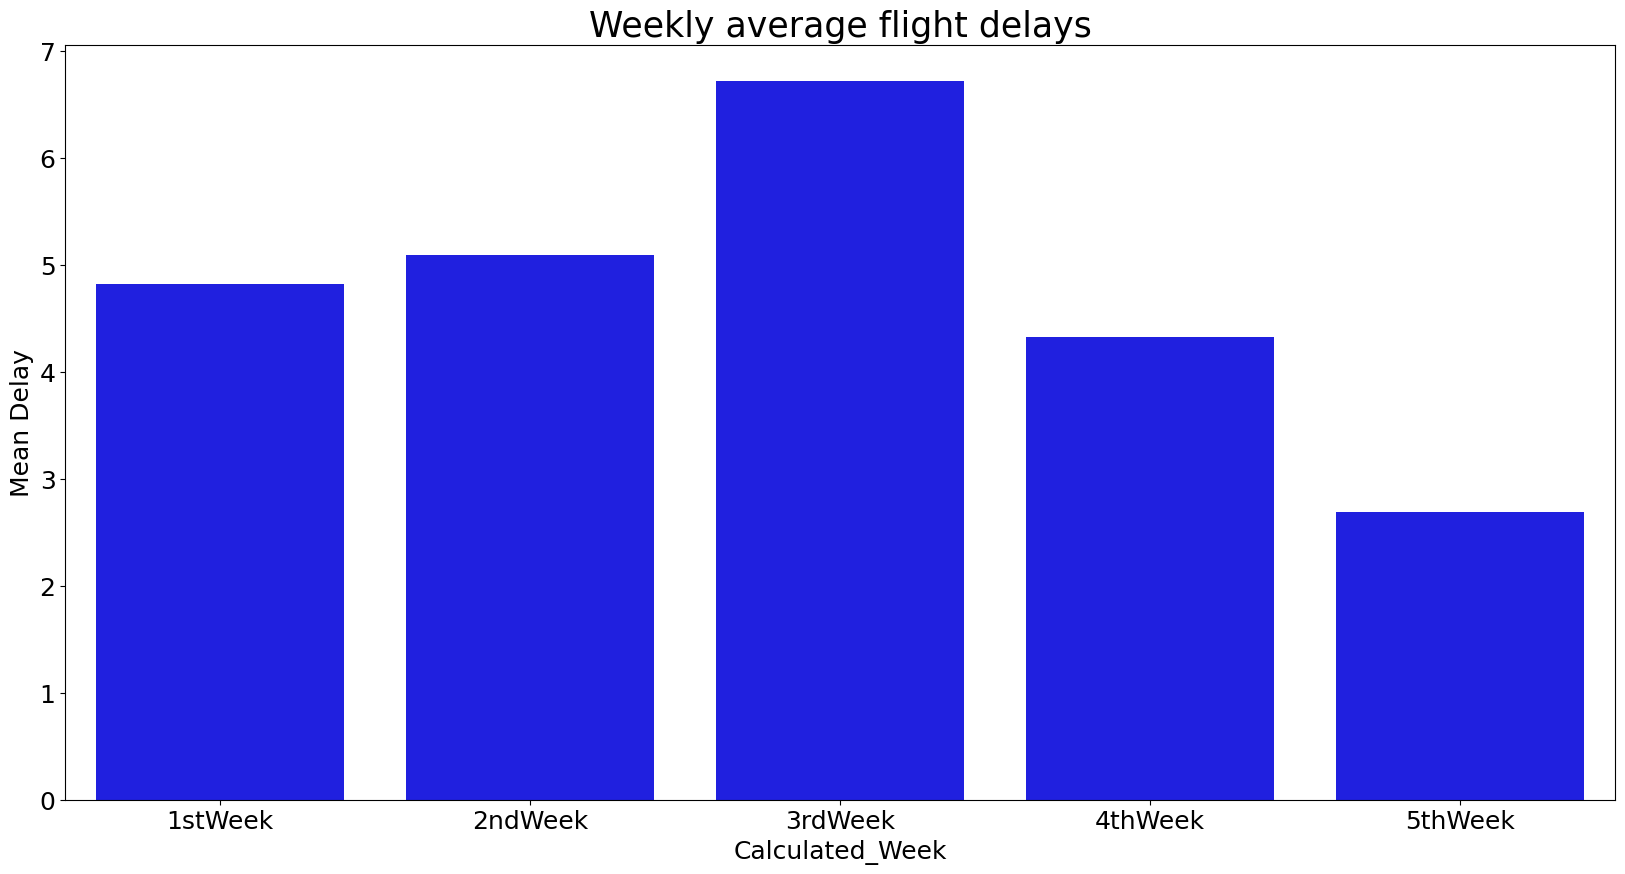

In [218]:
#This labels X-axis
plt.figure(figsize=(20, 10))
plt.xlabel("Weeks",fontsize=18)
#This labels Y-axis
plt.ylabel("Mean Delay",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#Graph code
sns.barplot(x=Graph.index, y ='Mean Delay', data=Graph, color ='blue')
fig = plt.title("Weekly average flight delays",fontsize=25)

In [219]:
final_flights['Month'] = pd.DatetimeIndex(final_flights['FL_DATE']).month

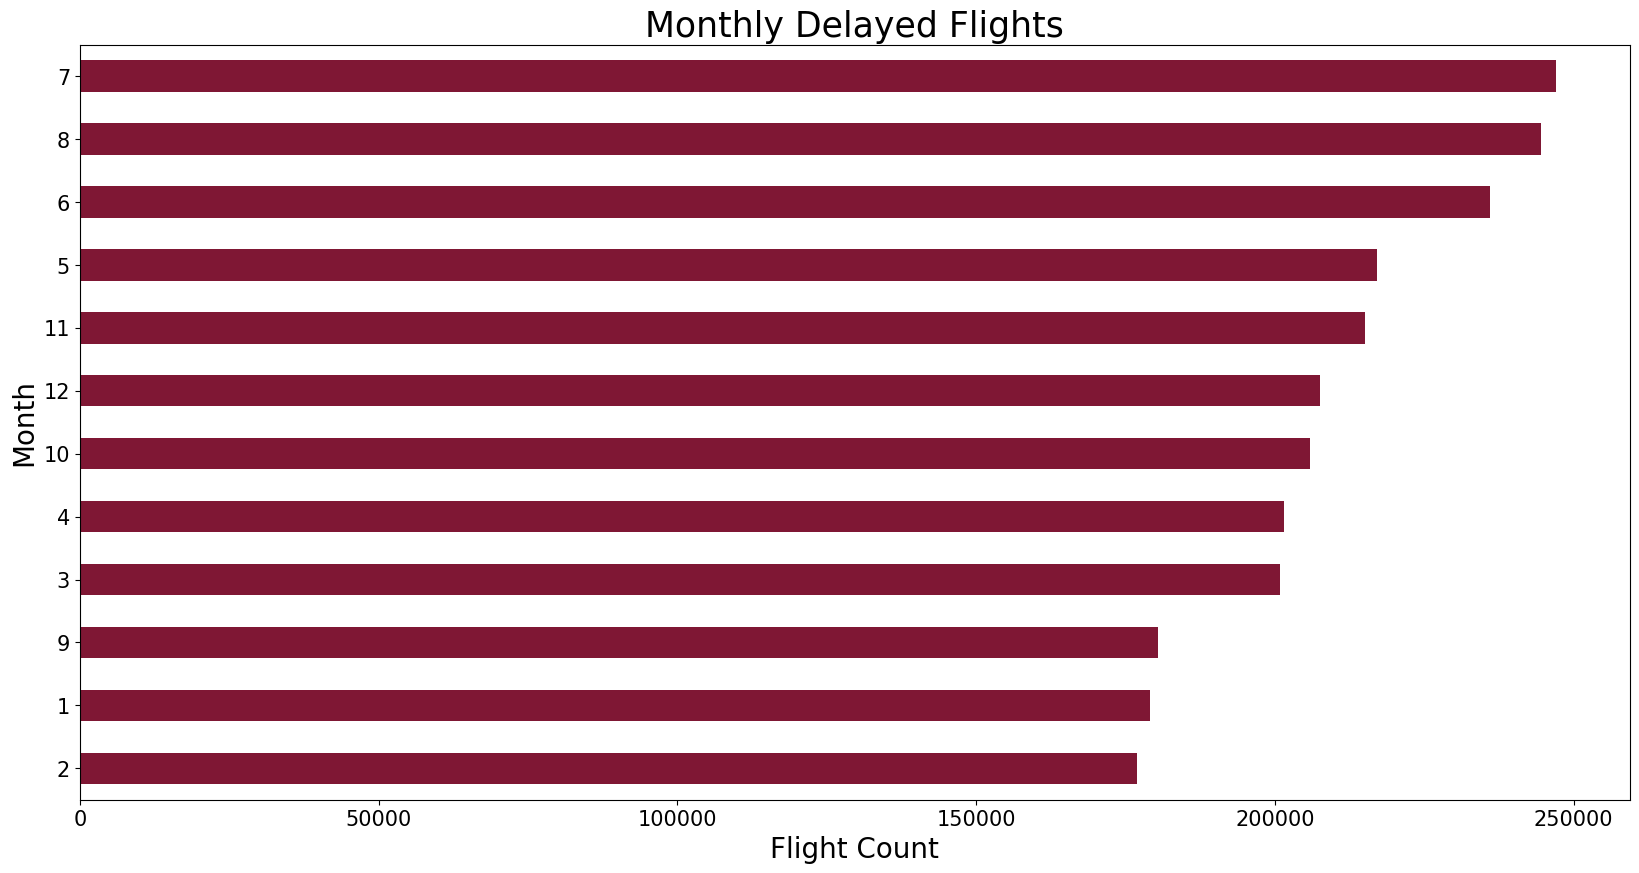

In [220]:
plt.figure(figsize=(20, 10))
final_flights.groupby('Month').Status.sum().sort_values(ascending=True).plot.barh(color='#7f1734')
plt.title('Monthly Delayed Flights', fontsize=25)
plt.xlabel('Flight Count', fontsize=20)
plt.ylabel('Month', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()




We are using **LABEL ENCODER** to encode all the string values of the dataframe into a respective integer. 

The machine learning algorithm only takes integer input so they have to be converted.

The String values of Following Columns are converted into integer :


**Airline**

**ORIGIN**

**DEST**

In [221]:
#Initializing LabelEncoder
le = LabelEncoder()
#Applying Label encoder to convert text values to numbers
final_flights['Airline']= le.fit_transform(final_flights['Airline'])
final_flights['ORIGIN'] = le.fit_transform(final_flights['ORIGIN'])
final_flights['DEST'] = le.fit_transform(final_flights['DEST'])

Making A new dataframe with **Airline** and **Airline_copy** attributes. 

This will be helpful later for changing the airline code back to Names.

In [222]:
Airline_encoding = final_flights[['Airline','Airline_copy']].copy()
Airline_encoding = Airline_encoding.drop_duplicates(subset='Airline', keep='first')
Airline_encoding



,Airline,Airline_copy
0,16,United Air Lines Inc.
614915,0,Alaska Airlines Inc.
857894,6,Endeavor Air
1089709,9,JetBlue Airways
1387467,4,Atlantic Southeast Airlines
1584050,7,Frontier Airlines Inc.
1701573,1,Allegiant Air LLC
1796765,8,Hawaiian Airlines Inc.
1880140,3,American Eagle Airlines Inc.
2164637,15,Spirit Air Lines


In [223]:
final_flights=final_flights.drop(['Airline_copy'],axis=1)
final_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7067661 entries, 0 to 7071816
Data columns (total 26 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Airline              int64         
 1   ORIGIN               int64         
 2   DEST                 int64         
 3   DISTANCE             float64       
 4   Actual_Departure     object        
 5   FL_DATE              datetime64[ns]
 6   Scheduled_Departure  object        
 7   DEP_DELAY            float64       
 8   Actual_Arrival       object        
 9   Scheduled_Arrival    object        
 10  ARR_DELAY            float64       
 11  CRS_ELAPSED_TIME     float64       
 12  ACTUAL_ELAPSED_TIME  float64       
 13  AIR_TIME             float64       
 14  TAXI_IN              float64       
 15  TAXI_OUT             float64       
 16  DIVERTED             float64       
 17  CARRIER_DELAY        float64       
 18  WEATHER_DELAY        float64       
 19  NAS_DELAY            

We are dropping Columns that we don't need for our prediction. 

**CARRIER_DELAY**

**WEATHER_DELAY**

**NAS_DELAY**

**SECURITY_DELAY**

**LATE_AIRCRAFT_DELAY**

We removed the above columns since they had less than 50 percent data and our Research question revolves around Airline performance rather than the reason for the delay. 

We also removed the below columns since they are least corelated with **ARR_Delay** and removing them or keeping them wouldn't make much difference.

**Scheduled_Departure**

**Scheduled_Arrival**

**Actual_Arrival**

**FL_DATE**

**Actual_Departure**

**Calculated_Week**

**Date**

**Month**



In [224]:
final_flights1 = final_flights.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','FL_DATE','Actual_Departure','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','Calculated_Week','Date','Month'], axis = 1)

We have Created out Feature Vector with less but relevant attributes.

In [225]:
final_flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7067661 entries, 0 to 7071816
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Airline              int64  
 1   ORIGIN               int64  
 2   DEST                 int64  
 3   DISTANCE             float64
 4   DEP_DELAY            float64
 5   ARR_DELAY            float64
 6   CRS_ELAPSED_TIME     float64
 7   ACTUAL_ELAPSED_TIME  float64
 8   AIR_TIME             float64
 9   TAXI_IN              float64
 10  TAXI_OUT             float64
 11  DIVERTED             float64
 12  Status               int64  
dtypes: float64(9), int64(4)
memory usage: 754.9 MB


**Machine Learning**

The machine Learning section begins from here.
We are using Machine learning algorithm to compare accuracy and choose the best one for our Prediction.

**1.Linear Regression**

**2.Decision Tree**

**3.ADA Boost**

**4. RandomForest Regressor**




In [226]:
X = final_flights1.drop('ARR_DELAY',axis = 1)
y = final_flights1['ARR_DELAY']
print("The shape of DF is :",X.shape)
y.head()


The shape of DF is : (7067661, 12)


0   -23.0
1   -24.0
2   -13.0
3    -2.0
4    14.0
Name: ARR_DELAY, dtype: float64

We are splitting the dataset into 70% for training  and 30% for Testing and predicting the delay.
The data is splitted randomly but consistently. This is ensured by the variable  **random_state** 

If we don't have randon_state variable in our code, everytime we run the code we might get different set of 70 and 30 split. That would make the debugging a tedious task. 
Giving random_state ensures that the test and train data is split in a certain way. 

In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)


StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. 
For e.g. We have an attribute Distance which is in a scale of 50-5000 miles where air time has a the value in the scale 20-200. So they are standardized to a common sacle to predict more accurately.

The StandardScaler will transform our data such that its distribution will have a mean value 0 and standard deviation of 1.

In [228]:
Std_scaler=StandardScaler()
X_train_Std_scaler=Std_scaler.fit_transform(X_train)
X_test_Std_scaler=Std_scaler.transform(X_test)

We are applying **Linear Regression Model**

Linear regression is a model that is uesd to predict one variable based on the value of another variable The variable we want to predict is called the dependent variable (ARR_DELAY). The variable we are using to predict the other variable's value is called the independent variable (Our Feature Vector without ARR_DELAY).

In [229]:
AlgoL = LinearRegression()
fitValues = AlgoL.fit(X_train_Std_scaler,y_train)
y_pred = fitValues.predict(X_test_Std_scaler)
print ('The Mean Absolute Error is :' ,  mean_absolute_error(y_test, y_pred))
print('The Root Mean Squared Error is:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('The R2 score for the model is :' , r2_score(y_test, y_pred))

The Mean Absolute Error is : 0.0029236697204772276
The Root Mean Squared Error is: 0.38010587962665854
The R2 score for the model is : 0.9999342217501994


**Mean Aboslute Error:**

Absolute Error is the amount of error in the measurements. It is the difference between the measured value and “true” value.The Mean Absolute Error(MAE) is the average of all absolute errors. 

The Mean Aboslute Error for our algorithm is **0.0029236697204772276** which is very low and it says that our model has very less error.



**Root Mean Squared Error**

RMSE is a measure of how spread out these  are. In other words, it tells you how concentrated the data is around the line of best fit.This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In Our case the value is **0.38010587962665854**
In this metric, lower the value, better is the performance of the model. 0.38 is considerably a lower value when comapred to other models.



**R2 Score**

It is the Coefficient of Determination. It Measures  how close the actual values are to the fitted regression line. This takes a value between 0 and 1, 0 indicates that the model doesn't fit and 1 indicates the model fits accurately. In our case it is **0.9999342217501994** which is very accurate.





The Existing ARR_DELAY is plotted against the predicted value. 
Below is a scatter plot graph which depicts the difference between true value and predicted value.

The Code was referenced from 'https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html'

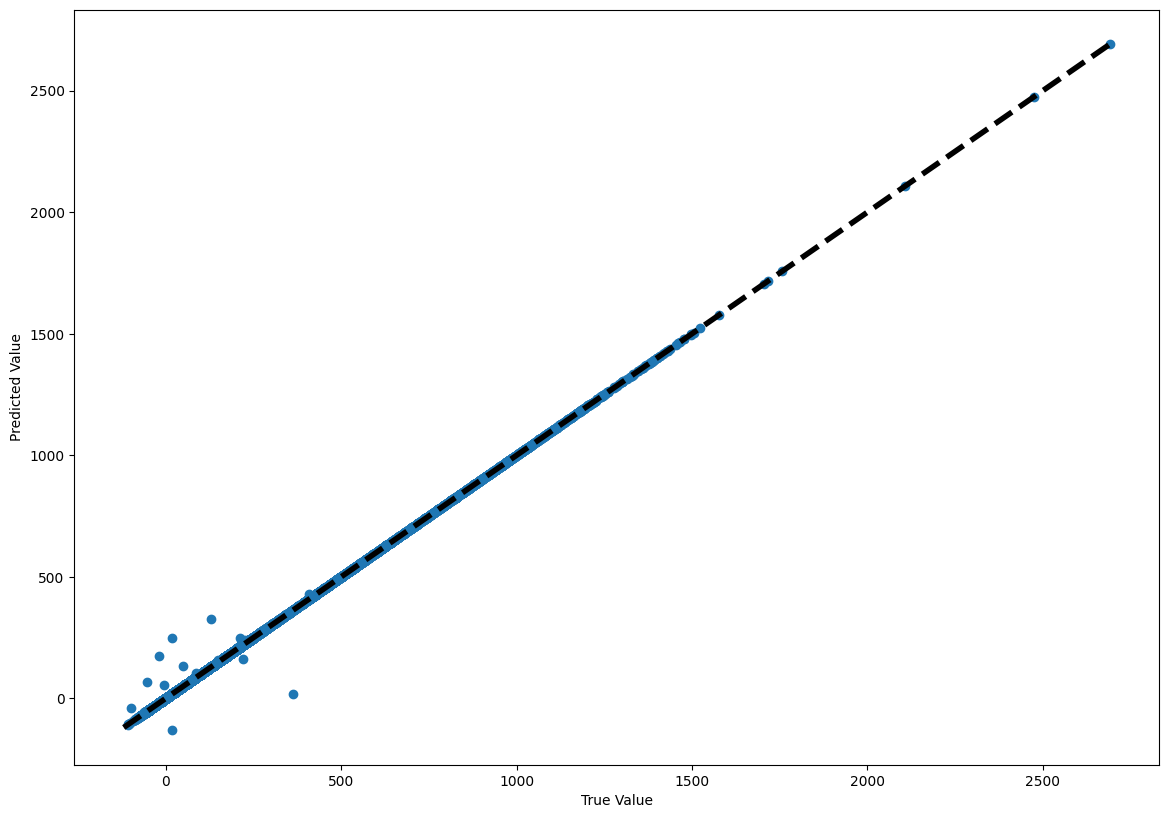

In [230]:
# This is a scatter plot graph which shows the trend.
fig, axes = plt.subplots()
axes.scatter(y_test, y_pred)
axes.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#Setting labels
axes.set_xlabel('True Value')
axes.set_ylabel('Predicted Value')
#Viewing the graph
plt.show()

**Decision Tree Regressor**

It is one of the most used classifer for predicting values. The main concept of Decision Tree Regressor is that it has three type of nodes. 1.Root Node  2.Interior Node  3.Leaf Node.

The Root node is the starting node which represents the entire sample. The interior node represents the rules which decide how to split the node further on. The final node is the leaf node which represents the final output. The algorithm is run at a particular point in the dataset and it traverses through the entire dataset and creates tree by answering True or false questions. The prediction value is the average value if the dependent variable in that particular leaf node. When the whole process is repeated multiple times the algorithm gives a proper output.

In [231]:
Algo = DecisionTreeRegressor(random_state = 2)
fit = Algo.fit(X_train_Std_scaler,y_train)
predict = fit.predict(X_test_Std_scaler)
print ('The R2 score for the model is :' , r2_score(y_test, predict))
print('The Root Mean Squared Error is:' , np.sqrt(mean_squared_error(y_test, predict)))
print ('The Mean Absolute Error is :' ,  mean_absolute_error(y_test, predict))

The R2 score for the model is : 0.9950628996696892
The Root Mean Squared Error is: 3.2930582057527715
The Mean Absolute Error is : 0.9384888640705863


**Mean Aboslute Error:**

Absolute Error is the amount of error in the measurements. It is the difference between the measured value and “true” value.The Mean Absolute Error(MAE) is the average of all absolute errors. 

The Mean Aboslute Error for our algorithm is **0.9384888640705863** which is very low and it says that our model has very less error.



**Root Mean Squared Error**

RMSE is a measure of how spread out these  are. In other words, it tells you how concentrated the data is around the line of best fit.This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In Our case the value is **3.2930582057527715**
In this metric, lower the value, better is the performance of the model. 3.2 is considerably a lower value when comapred to other models.



**R2 Score**

It is the Coefficient of Determination. It Measures  how close the actual values are to the fitted regression line. This takes a value between 0 and 1, 0 indicates that the model doesn't fit and 1 indicates the model fits accurately. In our case it is **0.9950628996696892** which is very accurate.



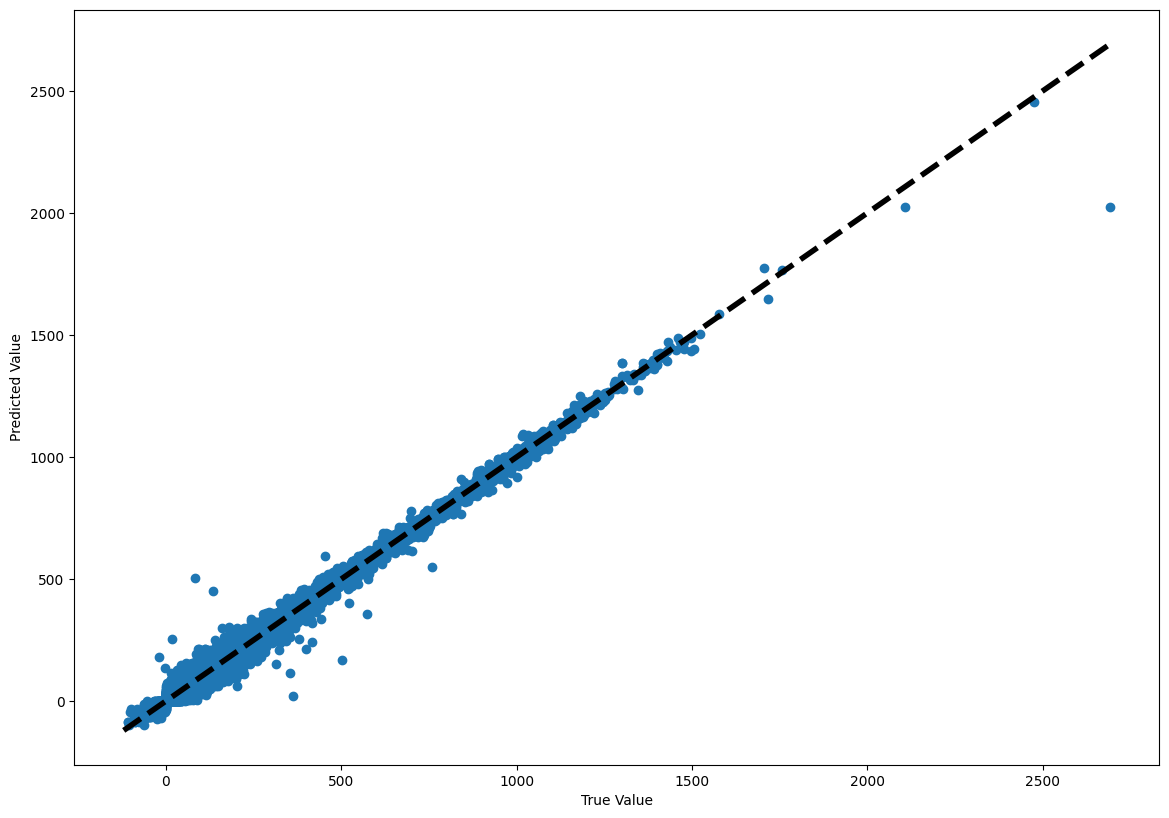

In [232]:
# This is a scatter plot graph which shows the trend.
fig, axes = plt.subplots()
axes.scatter(y_test, predict)
axes.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#Setting labels
axes.set_xlabel('True Value')
axes.set_ylabel('Predicted Value')
#Viewing the graph
plt.show()

**Boosted Linear Regression**


Adaptive Boosting is abbreviated as AdaBoost. The biggest beneficiary of Ada Boosting is to improve the performance of decision trees that are based on binary classification problems. It is used to improve the efficiency and training of poor classifiers.

In [233]:
Algo = AdaBoostRegressor(base_estimator=AlgoL,random_state=2)
fit = Algo.fit(X_train_Std_scaler,y_train)
predict = fit.predict(X_test_Std_scaler)
print ('The R2 score for the model is :' , r2_score(y_test, predict))
print('The Root Mean Squared Error is:' , np.sqrt(mean_squared_error(y_test, predict)))
print ('The Mean Absolute Error is :' ,  mean_absolute_error(y_test, predict))

The R2 score for the model is : 0.8211545974828004
The Root Mean Squared Error is: 19.81993933359425
The Mean Absolute Error is : 13.871876151413886


**Mean Aboslute Error:**

Absolute Error is the amount of error in the measurements. It is the difference between the measured value and “true” value.The Mean Absolute Error(MAE) is the average of all absolute errors. 

The Mean Aboslute Error for our algorithm is **13.871876151413886** which is  low and it says that our model has less error.



**Root Mean Squared Error**

RMSE is a measure of how spread out these  are. In other words, it tells you how concentrated the data is around the line of best fit.This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In Our case the value is **19.81993933359425**
In this metric, lower the value, better is the performance of the model. 19.81 is not a bad score when comapred to other models.



**R2 Score**

It is the Coefficient of Determination. It Measures  how close the actual values are to the fitted regression line. This takes a value between 0 and 1, 0 indicates that the model doesn't fit and 1 indicates the model fits accurately. In our case it is **0.8211545974828004** which is very accurate.

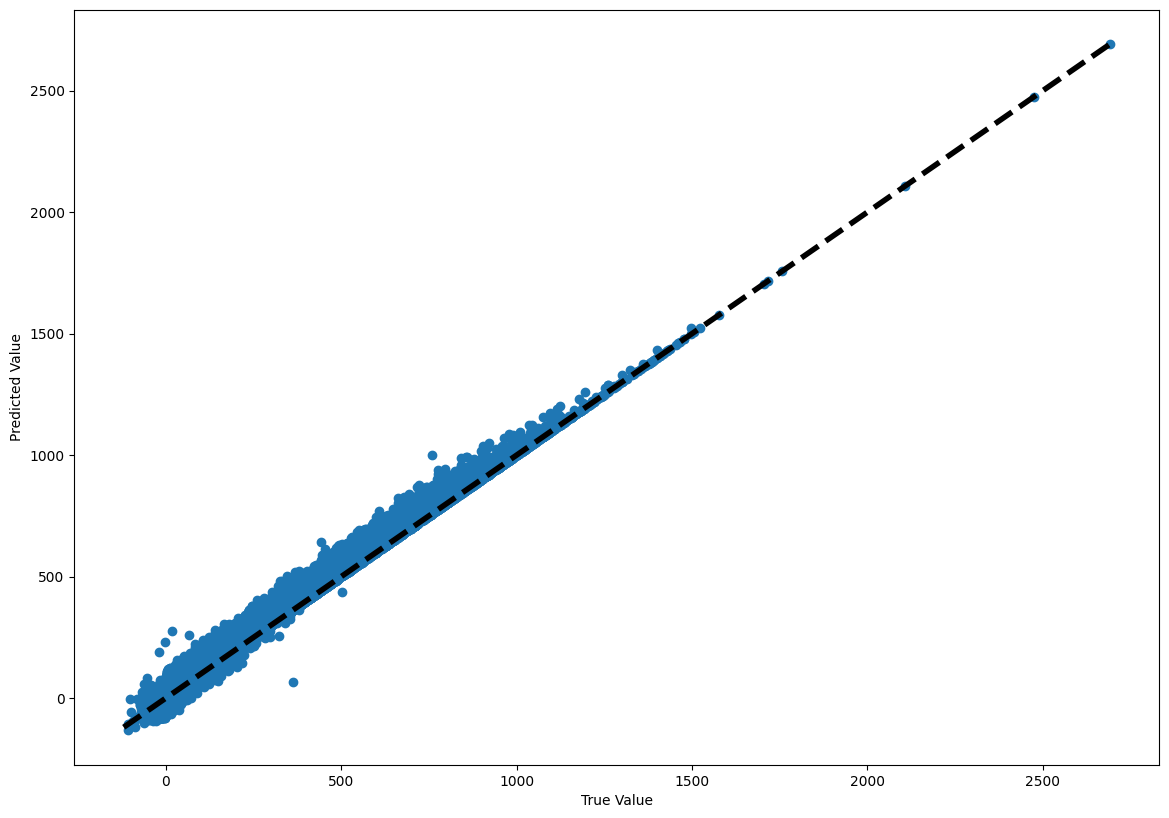

In [234]:
# This is a scatter plot graph which shows the trend.
fig, axes = plt.subplots()
axes.scatter(y_test, predict)
axes.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#Setting labels
axes.set_xlabel('True Value')
axes.set_ylabel('Predicted Value')
#Viewing the graph
plt.show()

As observed from the above models, the **Linear Regression** provides the accurate results. 

So we will be considering only Linear regression for our exploratory analysis.

Combining the predicted values with their corresponding feature vector rows.

We perform outer join to combine the train and test data.

In [235]:
merged_test=pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
pred_df = pd.DataFrame(y_pred)
merged_test.reset_index(inplace=True)
pred_df = pred_df.rename({0: 'Predict'}, axis=1)
final_output=pd.merge(merged_test, pred_df, left_index=True, right_index=True, how='outer')



We are creating a new feature in the feature vector which tell us if the flight has beed delayed or not rather than telling us how deayed it is. 

The status columns has two values 0 and 1. Here 0 represents that the flight is not delayed and 1 represents that the flight is delayed. 

This conversion helps us in answering our research question when they are put in a graph.

In [236]:
final_output['Status'] = np.where(final_output['Predict']<=0, 0,1)
final_output

,index,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,ARR_DELAY,Predict
0,4351261,14,283,87,1052.0,7.0,165.0,159.0,142.0,7.0,10.0,0.0,1,1.0,1.002237
1,3567890,14,87,210,973.0,3.0,145.0,140.0,118.0,8.0,14.0,0.0,0,-2.0,-2.002755
2,5274371,2,99,92,986.0,-1.0,193.0,177.0,139.0,23.0,15.0,0.0,0,-17.0,-16.995653
3,2524381,11,259,71,282.0,0.0,94.0,87.0,68.0,9.0,10.0,0.0,0,-7.0,-7.000184
4,3677681,14,212,83,249.0,-1.0,65.0,57.0,41.0,7.0,9.0,0.0,0,-9.0,-9.001155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120294,5974814,2,295,92,1171.0,-5.0,183.0,176.0,145.0,15.0,16.0,0.0,0,-12.0,-11.999702
2120295,526466,16,23,91,775.0,-6.0,134.0,127.0,106.0,9.0,12.0,0.0,0,-13.0,-13.001286
2120296,3352361,13,347,247,222.0,-10.0,82.0,73.0,43.0,20.0,10.0,0.0,0,-19.0,-18.997862
2120297,1583955,4,163,243,395.0,38.0,95.0,76.0,57.0,5.0,14.0,0.0,1,19.0,19.004914


To answer our research question we need a dataframe with name of the **Airline**, **Number of Delayed Flights**, **No of On time Flights** and **Total Flights**. 

So we are running a script which will combine all the flights by its ID and give us a consolidated report.

In [237]:
arr= final_output['Airline'].unique()
List = {'Airline':[],
        'Delayed_Count':[],
        'On_Time_Flights':[],
        'Total_Filghts':[],
       'Percentage_delayed':[]}
L = pd.DataFrame(List)
for i in arr:
    Airline_delay_count=final_output[final_output["Airline"]==i].sum()["Status"]
    Airline_total=final_output[final_output["Airline"]==i].count()["Status"];
    nodly= Airline_total-Airline_delay_count;
    Percentage_delayed = round(((Airline_delay_count*100)/Airline_total),2)
    new_row={'Airline':i,
        'Delayed_Count':Airline_delay_count,
        'On_Time_Flights':nodly,
        'Total_Filghts':Airline_total,
        'Percentage_delayed':Percentage_delayed}
    L = L.append(new_row, ignore_index=True)

This Dataframe gives the flight Id and their stats. This could not be used for creating a graph due to the absence of Airline Names. 

In [238]:
L

,Airline,Delayed_Count,On_Time_Flights,Total_Filghts,Percentage_delayed
0,14.0,154503.0,244983.0,399486.0,38.68
1,2.0,101897.0,168585.0,270482.0,37.67
2,11.0,32281.0,47423.0,79704.0,40.50
3,12.0,30197.0,60852.0,91049.0,33.17
4,4.0,20516.0,38341.0,58857.0,34.86
5,13.0,79751.0,148168.0,227919.0,34.99
6,5.0,78278.0,204795.0,283073.0,27.65
7,10.0,23649.0,38475.0,62124.0,38.07
8,16.0,64652.0,119707.0,184359.0,35.07
9,15.0,16907.0,35486.0,52393.0,32.27


The Previous Dataset is combined with Airline_encoding which stores Airline code and Airline name. 

This dataframe is used for analysis of our research question. 

In [239]:
result = pd.merge(L,
                 Airline_encoding[['Airline','Airline_copy']],
                 on='Airline')
result

,Airline,Delayed_Count,On_Time_Flights,Total_Filghts,Percentage_delayed,Airline_copy
0,14.0,154503.0,244983.0,399486.0,38.68,Southwest Airlines Co.
1,2.0,101897.0,168585.0,270482.0,37.67,American Airlines Inc.
2,11.0,32281.0,47423.0,79704.0,40.50,"PSA Airlines, Inc."
3,12.0,30197.0,60852.0,91049.0,33.17,Republic Airways Inc
4,4.0,20516.0,38341.0,58857.0,34.86,Atlantic Southeast Airlines
5,13.0,79751.0,148168.0,227919.0,34.99,Skywest Airlines Inc.
6,5.0,78278.0,204795.0,283073.0,27.65,Delta Air Lines Inc.
7,10.0,23649.0,38475.0,62124.0,38.07,"Mesa Airlines, Inc."
8,16.0,64652.0,119707.0,184359.0,35.07,United Air Lines Inc.
9,15.0,16907.0,35486.0,52393.0,32.27,Spirit Air Lines


**Research Question**

**1.Which is the best and worst performing Airline company**

This is answered by plotting a bargraph which shows the total number of flights, Number of Ontime flights and Number of Delayed flights of each airline. 

The difference in size of bar for On Time Flights and Delayed FLights tells us the performance. 

The percentage on top of the bargraph tells us the percentage of flight delayed.

The bigger the difference the better the performance of the airline.

From the below graph it can be seen that, **Delta Air Lines Inc. is the best performing airline** based on the percentage of flights delayed. It has **28.0%** delayed flights  followed by **Endeavor Air at 31.15%** and **Spirit Airlines Inc. at 32.52%**

From our prediction it was observed that the most reliable airline all throughout the year is **Delta Air Lines Inc.** and the most unreliable airline is **Frontier Airlines Inc.** 



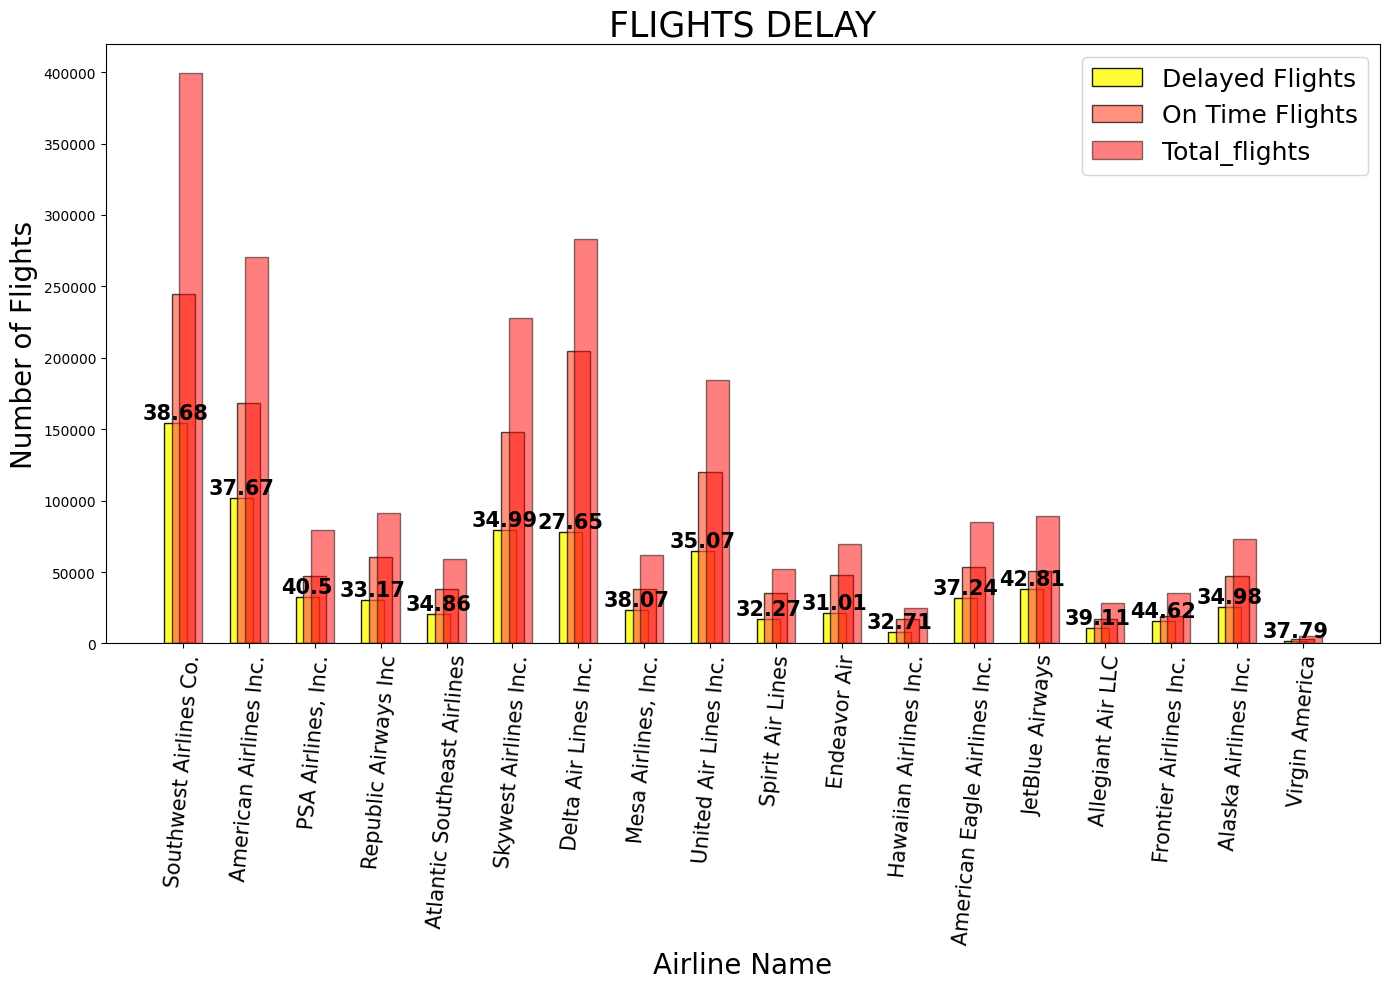

In [240]:

#figure(figsize=(20, 30), dpi=100)
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100

Airline = result["Airline_copy"].tolist()
Delayed_Count = result["Delayed_Count"].tolist()
On_Time_Flights = result["On_Time_Flights"].tolist()
Total_flights = result["Total_Filghts"].tolist()
Percentage_delayed = result["Percentage_delayed"].tolist()
x = np.arange(len(Airline))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax=plt.axes()
ax.set_facecolor("#ffffff")
rects1 = ax.bar(x - width/3, Delayed_Count, width, label='Delayed Flights',color=['#fefe22'],alpha=0.9,edgecolor='black')
rects2 = ax.bar(x , On_Time_Flights, width, label='On Time Flights',color=['#ff6347'],alpha=0.7,edgecolor='black')
rects3 = ax.bar(x + width/3, Total_flights, width, label='Total_flights',color=['#ff0000'],alpha=0.5,edgecolor='black')
ax.autoscale(tight=False)
count = 0;
for bar in rects1:
   
  height= bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{Percentage_delayed[count]}',fontweight='bold',fontsize=15
          ,color='black', ha='center',
  va='bottom');
  count+=1;



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Flights',fontsize=20)
ax.set_xlabel('Airline Name',fontsize=20)
ax.set_title('FLIGHTS DELAY',fontsize=25)
ax.set_xticks(x)
plt.xticks(rotation=85)
ax.set_xticklabels(Airline,fontsize=15)
ax.legend(prop={'size': 18})


fig.tight_layout()

plt.show()

In [241]:
final_flights

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,Calculated_Week,Status,Month
0,16,113,91,1605.0,15:12:00,2018-01-01,15:17:00,-5.0,17:22:00,17:45:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
1,16,186,307,414.0,11:07:00,2018-01-01,11:15:00,-8.0,12:30:00,12:54:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
2,16,320,91,846.0,13:30:00,2018-01-01,13:35:00,-5.0,16:36:00,16:49:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
3,16,293,247,1120.0,15:52:00,2018-01-01,15:46:00,6.0,17:54:00,17:56:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
4,16,247,14,723.0,06:50:00,2018-01-01,06:30:00,20.0,09:36:00,09:22:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071812,5,21,324,444.0,10:30:00,2018-12-31,10:25:00,5.0,12:04:00,11:56:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,1,12
7071813,5,324,21,444.0,12:43:00,2018-12-31,12:40:00,3.0,14:14:00,14:20:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,0,12
7071814,5,21,121,581.0,14:27:00,2018-12-31,14:05:00,22.0,16:07:00,15:55:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,1,12
7071815,5,121,21,581.0,16:55:00,2018-12-31,16:55:00,0.0,18:34:00,18:51:00,...,0.0,NaN,NaN,NaN,NaN,NaN,31,5thWeek,0,12


To answer our another research question we gather the flight records of flights that ran during the holiday season.

We have taken 11 US holidays and gathered the records of flights that ran during and around those days.

**New Year's Day**

**M L King Day**

**Presidents' Day**

**Good Friday**

**Easter Sunday**

**Memorial Day**

**Independence Day**

**Labor Day**

**Halloween**

**Thanksgiving Day**

**Christmas**



In [242]:

m1 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-1-1')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-1-10'))]
m2 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-1-14')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-1-16'))]
m3 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-3-27')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-3-29'))]

m4 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-7-2')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-7-6'))]

m5 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-9-2')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-9-5'))]

m6 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-11-11')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-11-13'))]

m7 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-11-17')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-11-27'))]

m8 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-12-4')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-12-6'))]

m9 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-12-20')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-12-31'))]
m10 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-3-28')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-4-4'))]

m11 = final_flights[(final_flights['FL_DATE'] >= pd.to_datetime('2018-10-15')) & (final_flights['FL_DATE'] <= pd.to_datetime('2018-10-20'))]



In [243]:
Leave = m1.append([m2, m3,m4,m5,m6,m7,m8,m9,m10,m11])
Leave

,Airline,ORIGIN,DEST,DISTANCE,Actual_Departure,FL_DATE,Scheduled_Departure,DEP_DELAY,Actual_Arrival,Scheduled_Arrival,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date,Calculated_Week,Status,Month
0,16,113,91,1605.0,15:12:00,2018-01-01,15:17:00,-5.0,17:22:00,17:45:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
1,16,186,307,414.0,11:07:00,2018-01-01,11:15:00,-8.0,12:30:00,12:54:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
2,16,320,91,846.0,13:30:00,2018-01-01,13:35:00,-5.0,16:36:00,16:49:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
3,16,293,247,1120.0,15:52:00,2018-01-01,15:46:00,6.0,17:54:00,17:56:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,0,1
4,16,247,14,723.0,06:50:00,2018-01-01,06:30:00,20.0,09:36:00,09:22:00,...,0.0,NaN,NaN,NaN,NaN,NaN,1,1stWeek,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893185,5,99,260,453.0,15:42:00,2018-10-20,15:37:00,5.0,17:16:00,17:19:00,...,0.0,NaN,NaN,NaN,NaN,NaN,20,3rdWeek,0,10
6893186,5,223,21,442.0,05:52:00,2018-10-20,06:00:00,-8.0,07:14:00,07:32:00,...,0.0,NaN,NaN,NaN,NaN,NaN,20,3rdWeek,0,10
6893187,5,21,259,508.0,11:18:00,2018-10-20,11:25:00,-7.0,12:55:00,13:02:00,...,0.0,NaN,NaN,NaN,NaN,NaN,20,3rdWeek,0,10
6893188,5,316,305,689.0,11:15:00,2018-10-20,11:15:00,0.0,12:25:00,12:28:00,...,0.0,NaN,NaN,NaN,NaN,NaN,20,3rdWeek,0,10


We are Looking at a corelation matrix graph. This helps us understand which attribure is most and least co-related with which attribute. 

From the graph we can see that **ARR_DELAY** is closely corelated with **DEP_DELAY**.

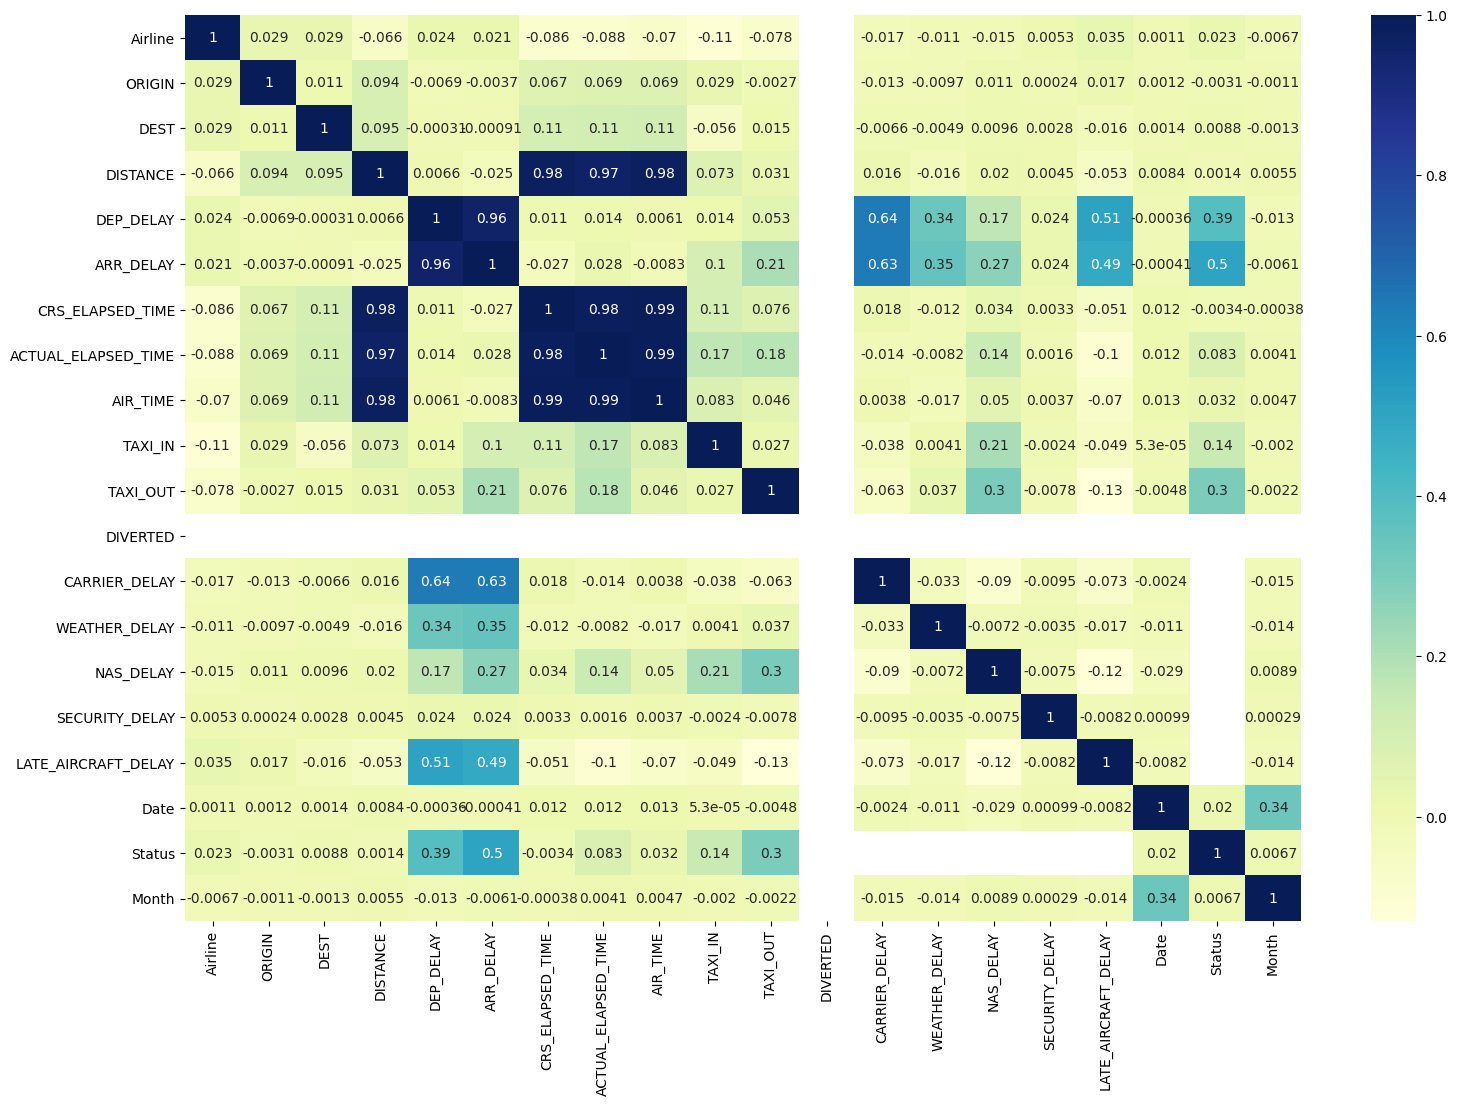

In [244]:
plt.subplots(figsize=(18,12))
corrMatrix = Leave.corr()
sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

We are dropping Columns that we don't need for our prediction. 

**CARRIER_DELAY**

**WEATHER_DELAY**

**NAS_DELAY**

**SECURITY_DELAY**

**LATE_AIRCRAFT_DELAY**

We removed the above columns since they had less than 50 percent data and our Research question revolves around Airline performance rather than the reason for the delay. 

We also removed the below columns since they are least corelated with **ARR_Delay** and removing them or keeping them wouldn't make much difference.

**Scheduled_Departure**

**Scheduled_Arrival**

**Actual_Arrival**

**FL_DATE**

**Actual_Departure**

**Calculated_Week**

**Date**



In [245]:
Leave1 = Leave.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','FL_DATE','Actual_Departure','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','Calculated_Week','Date'], axis = 1)
Leave1.columns

Index(['Airline', 'ORIGIN', 'DEST', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN',
       'TAXI_OUT', 'DIVERTED', 'Status', 'Month'],
      dtype='object')

In [246]:
Leave1['Airline_copy']=Leave1['Airline']

In [247]:
Leave1.head(5)

,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month,Airline_copy
0,16,113,91,1605.0,-5.0,-23.0,268.0,250.0,225.0,10.0,15.0,0.0,0,1,16
1,16,186,307,414.0,-8.0,-24.0,99.0,83.0,65.0,7.0,11.0,0.0,0,1,16
2,16,320,91,846.0,-5.0,-13.0,134.0,126.0,106.0,5.0,15.0,0.0,0,1,16
3,16,293,247,1120.0,6.0,-2.0,190.0,182.0,157.0,6.0,19.0,0.0,0,1,16
4,16,247,14,723.0,20.0,14.0,112.0,106.0,83.0,10.0,13.0,0.0,1,1,16


In [248]:
Leave1 = Leave1.drop(['Airline_copy'], axis = 1)
Leave1.head()

,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month
0,16,113,91,1605.0,-5.0,-23.0,268.0,250.0,225.0,10.0,15.0,0.0,0,1
1,16,186,307,414.0,-8.0,-24.0,99.0,83.0,65.0,7.0,11.0,0.0,0,1
2,16,320,91,846.0,-5.0,-13.0,134.0,126.0,106.0,5.0,15.0,0.0,0,1
3,16,293,247,1120.0,6.0,-2.0,190.0,182.0,157.0,6.0,19.0,0.0,0,1
4,16,247,14,723.0,20.0,14.0,112.0,106.0,83.0,10.0,13.0,0.0,1,1


**Machine Learning**

The machine Learning section begins from here.
In our last prediction it was observed that Linear regression model is most accurate for this dataset. so for our other research question we will be using only 
**Linear Regression**



In [249]:
X = Leave1.drop('ARR_DELAY',axis = 1)
y = Leave1['ARR_DELAY']
print("The shape of DF is :",X.shape)
y.head()

The shape of DF is : (1286812, 13)


0   -23.0
1   -24.0
2   -13.0
3    -2.0
4    14.0
Name: ARR_DELAY, dtype: float64

We are splitting the dataset into 70% for training  and 30% for Testing and predicting the delay.
The data is splitted randomly but consistently. This is ensured by the variable  **random_state** 

If we don't have randon_state variable in our code, everytime we run the code we might get different set of 70 and 30 split. That would make the debugging a tedious task. 
Giving random_state ensures that the test and train data is split in a certain way. 

In [250]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42)


StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. 
For e.g. We have an attribute Distance which is in a scale of 50-5000 miles where air time has a the value in the scale 20-200. So they are standardized to a common sacle to predict more accurately.

The StandardScaler will transform our data such that its distribution will have a mean value 0 and standard deviation of 1.

In [251]:
Std_scaler=StandardScaler()
X_train_Std_scaler=Std_scaler.fit_transform(X_train)
X_test_Std_scaler=Std_scaler.transform(X_test)

We are applying **Linear Regression Model**

Linear regression is a model that is uesd to predict one variable based on the value of another variable The variable we want to predict is called the dependent variable (ARR_DELAY). The variable we are using to predict the other variable's value is called the independent variable (Our Feature Vector without ARR_DELAY).

In [252]:
Algo = LinearRegression()
fitValues = Algo.fit(X_train_Std_scaler,y_train)
y_pred = fitValues.predict(X_test_Std_scaler)
print ('The Mean Absolute Error is :' ,  mean_absolute_error(y_test, y_pred))
print('The Root Mean Squared Error is:' , np.sqrt(mean_squared_error(y_test, y_pred)))
print ('The R2 score for the model is :' , r2_score(y_test, y_pred))

The Mean Absolute Error is : 0.0004905530757032118
The Root Mean Squared Error is: 0.14496614563359672
The R2 score for the model is : 0.9999908592537756


**Mean Aboslute Error:**

Absolute Error is the amount of error in the measurements. It is the difference between the measured value and “true” value.The Mean Absolute Error(MAE) is the average of all absolute errors. 

The Mean Aboslute Error for our algorithm is **0.0004905530757032118** which is very low and it says that our model has very less error.



**Root Mean Squared Error**

RMSE is a measure of how spread out these  are. In other words, it tells you how concentrated the data is around the line of best fit.This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model

In Our case the value is **0.14496614563359672**
In this metric, lower the value, better is the performance of the model. 0.14 is considerably a lower value when comapred to other models.



**R2 Score**

It is the Coefficient of Determination. It Measures  how close the actual values are to the fitted regression line. This takes a value between 0 and 1, 0 indicates that the model doesn't fit and 1 indicates the model fits accurately. In our case it is **0.9999908592537756** which is very accurate.






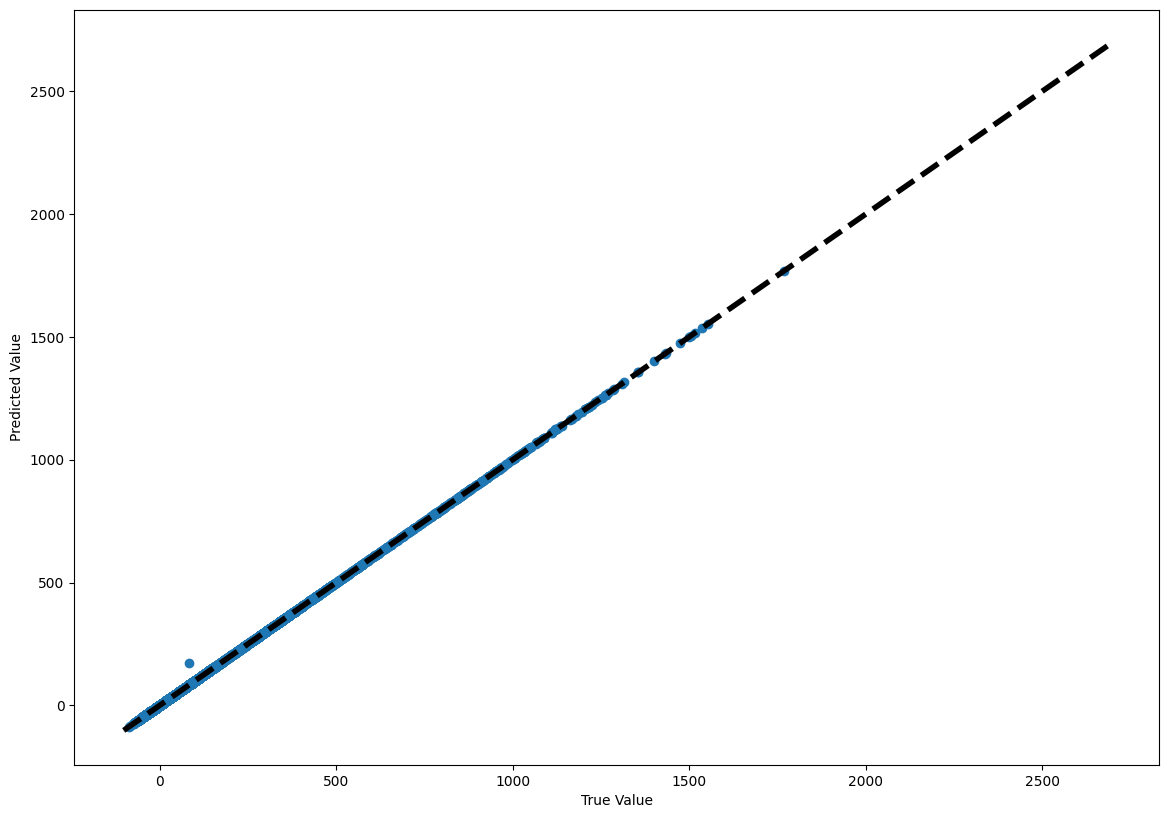

In [253]:
# This is a scatter plot graph which shows the trend.
fig, axes = plt.subplots()
axes.scatter(y_test, y_pred)
axes.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#Setting labels
axes.set_xlabel('True Value')
axes.set_ylabel('Predicted Value')
#Viewing the graph
plt.show()

Combining the predicted values with their corresponding feature vector rows.

We perform outer join to combine the train and test data.

In [254]:
pred_df = pd.DataFrame(y_pred)
X_test.reset_index(inplace=True)
merged_test=pd.merge(X_test, pred_df, left_index=True, right_index=True, how='outer')
merged_test.reset_index(inplace=True)
merged_test = merged_test.rename({0: 'Predict'}, axis=1)
merged_test

,level_0,index,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month,Predict
0,0,2634222,13,338,21,227.0,-11.0,79.0,83.0,45.0,5.0,33.0,0.0,0,1,-7.000395
1,1,2548574,11,71,227,526.0,-6.0,111.0,100.0,81.0,3.0,16.0,0.0,0,10,-17.000092
2,2,5451528,2,71,247,599.0,-2.0,150.0,131.0,98.0,9.0,24.0,0.0,0,4,-20.999824
3,3,1572820,4,163,164,542.0,-6.0,110.0,106.0,85.0,5.0,16.0,0.0,0,12,-10.000157
4,4,7009420,5,305,21,2182.0,1.0,289.0,271.0,244.0,8.0,19.0,0.0,0,12,-16.999939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386039,386039,1788144,1,266,306,809.0,0.0,133.0,141.0,120.0,7.0,14.0,0.0,1,11,7.999887
386040,386040,6007601,2,71,210,468.0,-3.0,102.0,101.0,74.0,11.0,16.0,0.0,0,11,-4.000169
386041,386041,2772547,13,164,305,1430.0,0.0,244.0,240.0,220.0,7.0,13.0,0.0,0,3,-4.000390
386042,386042,4428886,14,55,261,369.0,-1.0,85.0,72.0,56.0,5.0,11.0,0.0,0,10,-14.000042


In [255]:
y_train = pd.DataFrame(y_train)
X_train.reset_index(inplace=True)
y_train.reset_index(inplace=True)
merged_train=pd.merge(X_train, y_train, left_index=True, right_index=True, how='outer')
merged_train = merged_train.rename({'ARR_DELAY': 'Predict'}, axis=1)
merged_train

,index_x,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month,index_y,Predict
0,5198261,12,83,247,264.0,-6.0,85.0,104.0,69.0,11.0,24.0,0.0,1,11,5198261,13.0
1,6599494,5,169,188,1814.0,0.0,269.0,265.0,234.0,17.0,14.0,0.0,0,7,6599494,-4.0
2,5168550,12,260,214,875.0,-8.0,166.0,170.0,145.0,5.0,20.0,0.0,0,10,5168550,-4.0
3,6157443,5,295,21,1892.0,-2.0,254.0,243.0,223.0,9.0,11.0,0.0,0,1,6157443,-13.0
4,5261602,2,90,44,399.0,67.0,94.0,83.0,58.0,9.0,16.0,0.0,1,1,5261602,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900763,3408392,14,91,256,991.0,2.0,175.0,180.0,152.0,5.0,23.0,0.0,1,1,3408392,7.0
900764,3680465,14,91,261,602.0,-2.0,115.0,122.0,89.0,4.0,29.0,0.0,1,3,3680465,5.0
900765,4930255,12,247,177,864.0,-3.0,149.0,149.0,117.0,4.0,28.0,0.0,0,1,4930255,-3.0
900766,6020010,2,233,92,852.0,-5.0,170.0,146.0,125.0,11.0,10.0,0.0,0,11,6020010,-29.0


In [256]:
merged_train.columns

Index(['index_x', 'Airline', 'ORIGIN', 'DEST', 'DISTANCE', 'DEP_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN',
       'TAXI_OUT', 'DIVERTED', 'Status', 'Month', 'index_y', 'Predict'],
      dtype='object')

Removing the unwanted columns 'index_x' and 'index_y'. 

In [257]:
merged_train = merged_train.drop(['index_x','index_y'],axis=1)

In [258]:
merged_test.columns

Index(['level_0', 'index', 'Airline', 'ORIGIN', 'DEST', 'DISTANCE',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED', 'Status', 'Month', 'Predict'],
      dtype='object')

Removing the unwanted columns 'level_0' and 'index'. 

In [259]:
merged_test = merged_test.drop(['level_0','index'],axis=1)

Combining merged_train and merged_test dataframe to get the feature vector along with our predicted value.

In [260]:
concat_data = pd.concat([merged_train, merged_test], axis=0)
concat_data

,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month,Predict
0,12,83,247,264.0,-6.0,85.0,104.0,69.0,11.0,24.0,0.0,1,11,13.000000
1,5,169,188,1814.0,0.0,269.0,265.0,234.0,17.0,14.0,0.0,0,7,-4.000000
2,12,260,214,875.0,-8.0,166.0,170.0,145.0,5.0,20.0,0.0,0,10,-4.000000
3,5,295,21,1892.0,-2.0,254.0,243.0,223.0,9.0,11.0,0.0,0,1,-13.000000
4,2,90,44,399.0,67.0,94.0,83.0,58.0,9.0,16.0,0.0,1,1,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386039,1,266,306,809.0,0.0,133.0,141.0,120.0,7.0,14.0,0.0,1,11,7.999887
386040,2,71,210,468.0,-3.0,102.0,101.0,74.0,11.0,16.0,0.0,0,11,-4.000169
386041,13,164,305,1430.0,0.0,244.0,240.0,220.0,7.0,13.0,0.0,0,3,-4.000390
386042,14,55,261,369.0,-1.0,85.0,72.0,56.0,5.0,11.0,0.0,0,10,-14.000042


We are creating a new feature in the feature vector which tell us if the flight has beed delayed or not rather than telling us how deayed it is. 

The status columns has two values 0 and 1. Here 0 represents that the flight is not delayed and 1 represents that the flight is delayed. 

This conversion helps us in answering our research question when they are put in a graph.

In [261]:
concat_data['Status'] = np.where(concat_data['Predict']<=0, 0,1)
concat_data

,Airline,ORIGIN,DEST,DISTANCE,DEP_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,Status,Month,Predict
0,12,83,247,264.0,-6.0,85.0,104.0,69.0,11.0,24.0,0.0,1,11,13.000000
1,5,169,188,1814.0,0.0,269.0,265.0,234.0,17.0,14.0,0.0,0,7,-4.000000
2,12,260,214,875.0,-8.0,166.0,170.0,145.0,5.0,20.0,0.0,0,10,-4.000000
3,5,295,21,1892.0,-2.0,254.0,243.0,223.0,9.0,11.0,0.0,0,1,-13.000000
4,2,90,44,399.0,67.0,94.0,83.0,58.0,9.0,16.0,0.0,1,1,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386039,1,266,306,809.0,0.0,133.0,141.0,120.0,7.0,14.0,0.0,1,11,7.999887
386040,2,71,210,468.0,-3.0,102.0,101.0,74.0,11.0,16.0,0.0,0,11,-4.000169
386041,13,164,305,1430.0,0.0,244.0,240.0,220.0,7.0,13.0,0.0,0,3,-4.000390
386042,14,55,261,369.0,-1.0,85.0,72.0,56.0,5.0,11.0,0.0,0,10,-14.000042


In [262]:
Airline_encoding['Airline_copy'].unique()

array(['United Air Lines Inc.', 'Alaska Airlines Inc.', 'Endeavor Air',
       'JetBlue Airways', 'Atlantic Southeast Airlines',
       'Frontier Airlines Inc.', 'Allegiant Air LLC',
       'Hawaiian Airlines Inc.', 'American Eagle Airlines Inc.',
       'Spirit Air Lines', 'PSA Airlines, Inc.', 'Skywest Airlines Inc.',
       'Virgin America', 'Southwest Airlines Co.', 'Mesa Airlines, Inc.',
       'Republic Airways Inc', 'American Airlines Inc.',
       'Delta Air Lines Inc.'], dtype=object)

To answer our research question we need a dataframe with name of the **Airline**, **Number of Delayed Flights**, **No of On time Flights**. 

So we are running a script which will combine all the flights by its ID and give us a consolidated report.

In [263]:
arr= concat_data['Airline'].unique()
List = {'Airline':[],
        'Delayed_Count':[],
        'On_Time_Flights':[],
        'Percentage_delayed':[]}
L = pd.DataFrame(List)
for i in arr:
    Airline_delay_count=concat_data[concat_data["Airline"]==i].sum()["Status"]
    Airline_total=concat_data[concat_data["Airline"]==i].count()["Status"];
    nodly= Airline_total-Airline_delay_count;
    Percentage_delayed = round(((Airline_delay_count*100)/Airline_total),2);
    new_row={'Airline':i,
        'Delayed_Count':Airline_delay_count,
        'On_Time_Flights':nodly,
        'Percentage_delayed':Percentage_delayed
        }
    L = L.append(new_row, ignore_index=True)

This Dataframe gives the flight Id and their stats. This could not be used for creating a graph due to the absence of Airline Names. 

In [264]:
L

,Airline,Delayed_Count,On_Time_Flights,Percentage_delayed
0,12.0,19050.0,35158.0,35.14
1,5.0,44955.0,120408.0,27.19
2,2.0,62544.0,101661.0,38.09
3,11.0,18678.0,30360.0,38.09
4,14.0,100667.0,149456.0,40.25
5,16.0,39667.0,72126.0,35.48
6,13.0,50287.0,86262.0,36.83
7,3.0,20841.0,30834.0,40.33
8,7.0,9649.0,11766.0,45.06
9,4.0,13779.0,20899.0,39.73


The Previous Dataset is combined with Airline_encoding which stores Airline code and Airline name. 

This dataframe is used for analysis of our research question. 

In [265]:
result1 = pd.merge(L,
                 Airline_encoding[['Airline','Airline_copy']],
                 on='Airline')
result1

,Airline,Delayed_Count,On_Time_Flights,Percentage_delayed,Airline_copy
0,12.0,19050.0,35158.0,35.14,Republic Airways Inc
1,5.0,44955.0,120408.0,27.19,Delta Air Lines Inc.
2,2.0,62544.0,101661.0,38.09,American Airlines Inc.
3,11.0,18678.0,30360.0,38.09,"PSA Airlines, Inc."
4,14.0,100667.0,149456.0,40.25,Southwest Airlines Co.
5,16.0,39667.0,72126.0,35.48,United Air Lines Inc.
6,13.0,50287.0,86262.0,36.83,Skywest Airlines Inc.
7,3.0,20841.0,30834.0,40.33,American Eagle Airlines Inc.
8,7.0,9649.0,11766.0,45.06,Frontier Airlines Inc.
9,4.0,13779.0,20899.0,39.73,Atlantic Southeast Airlines


In [266]:
Holiday_prediction = result1

We are dropping the Feature 'Airline' as it has the encoded value and we do not require it for the analysis.

In [267]:
Holiday_prediction=Holiday_prediction.drop(['Airline'],axis=1)
Holiday_prediction.columns

Index(['Delayed_Count', 'On_Time_Flights', 'Percentage_delayed',
       'Airline_copy'],
      dtype='object')

**Research Question**

**2.Which Airline company performs better during the Holdiays**

This is answered by plotting a bargraph which shows the Number of Ontime flights and Number of Delayed flights of each airline. 

The difference in size of bar for On Time Flights and Delayed FLights tells us the performance. 

The bigger the difference the better the performance of the airline.

From the below graph it can be seen that, **Delta Air Lines Inc. is the best performing airline** based on the percentage of flights delayed. It has **27.21%** delayed flights  followed by **Endeavor Air at 32.73%** and **Alaska Airlines Inc. at 32.83%**

So passengers can choose the most reliable airline company for their travel during the holidays. From our prediction it is seen that the most reliable airline during the holidays is **Delta Air Lines Inc.**

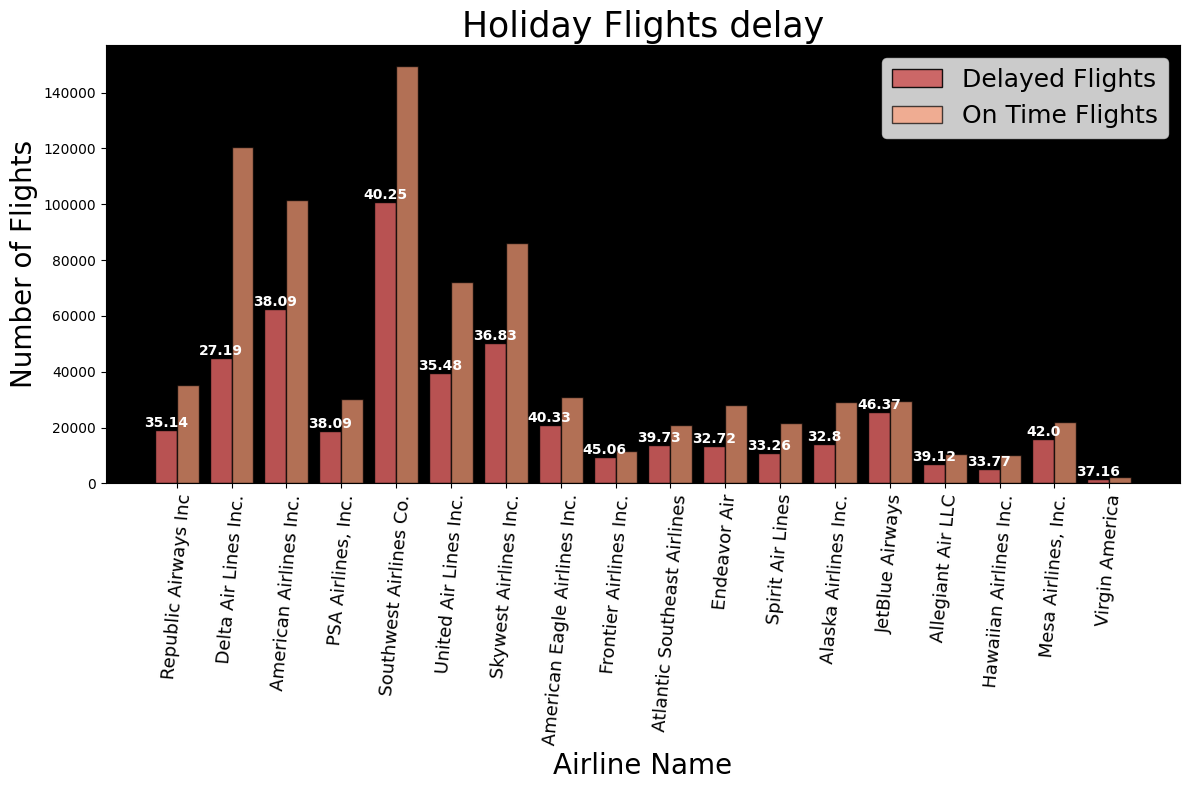

In [268]:

#figure(figsize=(20, 30), dpi=100)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

Airline = Holiday_prediction["Airline_copy"].tolist()
Delayed_Count = Holiday_prediction["Delayed_Count"].tolist()
On_Time_Flights = Holiday_prediction["On_Time_Flights"].tolist()
Percentage_delayed = Holiday_prediction["Percentage_delayed"].tolist()
x = np.arange(len(Airline))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
ax.set_facecolor("#000000")
rects1 = ax.bar(x - width/2, Delayed_Count, width, label='Delayed Flights',color=['#CD5C5C'],alpha=0.9,edgecolor='black')
rects2 = ax.bar(x + width/2, On_Time_Flights, width, label='On Time Flights',color=['#FFA07A'],alpha=0.7,edgecolor='black')
ax.autoscale(tight=False)
count = 0;
for bar in rects1:
   
  height= bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{Percentage_delayed[count]}',fontweight='bold',color='white', ha='center',
  va='bottom');
  count+=1;


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Flights',fontsize=20)
ax.set_xlabel('Airline Name',fontsize=20)
ax.set_title('Holiday Flights delay',fontsize=25)
ax.set_xticks(x)
plt.xticks(rotation=85)
ax.set_xticklabels(Airline,fontsize=13)
ax.legend(prop={'size': 18})

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()